# Data

People turn to data in order to tell a story, or solve a problem. Typically, we start with a question, and then look to data for answers. Whenever you look at data, it is important to be open to unexpected patterns, explanations, and unusual results. Sometimes the most interesting stories to be told with data are not ones we are set out to tell.

## What is data?

Data is used to described things by assigning a value ot them. The values are then organized processed, and presented within a given context so that it becomes useful. Data can be in two different forms: qualitiative and quantitative.

### Dataset Description

This data was used in the FiveThirtyEight story `Why We’re Sharing 3 Million Russian Troll Tweets`. This dataset contains data on tweets sent from Twitter handles connected to the Internet Research Agency.



Header | Definition
---|---------
`external_author_id` | An author account ID from Twitter 
`author` | The handle sending the tweet
`content` | The text of the tweet
`region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?id=000199367&type=1)
`language` | The language of the tweet
`publish_date` | The date and time the tweet was sent
`harvested_date` | The date and time the tweet was collected by Social Studio
`following` | The number of accounts the handle was following at the time of the tweet
`followers` | The number of followers the handle had at the time of the tweet
`updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
`post_type` | Indicates if the tweet was a retweet or a quote-tweet
`account_type` | Specific account theme, as coded by Linvill and Warren
`retweet` | A binary indicator of whether or not the tweet is a retweet
`account_category` | General account theme, as coded by Linvill and Warren
`new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018
`alt_external_id` | Reconstruction of author account ID from Twitter, derived from `article_url` variable and the first list provided to Congress
`tweet_id` | Unique id assigned by twitter to each status update, derived from `article_url`
`article_url` | Link to original tweet. Now redirects to "Account Suspended" page
`tco1_step1` | First redirect for the first http(s)://t.co/ link in a tweet, if it exists
`tco2_step1` | First redirect for the second http(s)://t.co/ link in a tweet, if it exists
`tco3_step1` | First redirect for the third http(s)://t.co/ link in a tweet, if it exists

## Quanitative Data

Quantitative data are measures of values or counts and are expressed as numbers. Quantitative data are data about numeric variables (e.g. how many; how much; or how often). Summarizing quantiative data in a single value inevitably loses a lot of information held in variation within the data. Understanding this variation may be key to working out the story the data may tell, and deciding how to analyze and visualize it. Often the first thing to do when examining a dataset is to chart the distribution of each continuous variable. You can think of this as the “shape” of the dataset, for each variable.

Many variables, such as human height and weight, follow a “normal” distribution. If you draw a graph plotting the range of values in the data along the horizontal axis (also known as the X axis), and the number of individual data points for each value on the vertical or Y axis, a normal distribution gives a bell-shaped curve.

In [1]:
import pandas as pd

df = pd.read_csv('data/IRAhandle_tweets_1.csv')

We are just going to investigate the quantiative data, so we are going to great a new dataframe that is filled only with the author and quantative variables.

### Exercise 1
* Create a new dataframe with the variable author and only the quantiative variables

In [2]:
quant_df = df[['author', 'following', 'followers', 'updates']]

## Measures of Central Tendency

The measures of central tendency are metrics that represent an answer to the following question: "What does the middle of our data look like?". The word `middle` is vague because there are multiple definitions we can use to represent the middle.

* Mean
* Median 
* Mode
* Range/Interquartile Range
* Standard Deviation
* Variance

## Mean

The mean is a descriptive statistics that looks at the average value of data. The mean represents a typical observation in our data set. If we were to pick one of our observations at random, then we're likely to get a valuve that's close to the mean.

In [3]:
quant_df[['following', 'followers', 'updates']].mean()

following    2008.342079
followers    2256.398219
updates      6433.557208
dtype: float64

The average number of `followers` is 2256.398. This teels us that most tweet authors have a decent amount of followers. Let's demonstrate if this is true.

In [4]:
import random
x = random.randint(1,101)

quant_df.iloc[x]['followers']

10366

There are multiple types of means, but this form is the most common use. This mean is referred to as the `arithmetic mean` since we are summing up the values.

## Median

The next measure of central tendency we'll cover is the median. The median also attempts to define a typical value in the dataset, but unlike mean, does not require calculation. To find the median, we first need to reorganize our dataset in ascending order. Then, the median is the value that coincides with the middle of the dataset. If there are an even amount of items, then we take the average of the two values that would `surround` the middle.

In [5]:
quant_df[['following', 'followers', 'updates']].median()

following     939.0
followers     611.0
updates      2759.0
dtype: float64

The median number of followers is alot lower than the mean. The difference between mean and median is due to robustness.

## The Problem of Outliers

The mean is calculated by summing up all the values we want and dividng by the numbe rof items, while the median is found by simply rearranging items. If we have outliers in our data, items that are much higher or lower than the other values, it can have an adverse effect on the mean. The mean is not `robust` to outliers. The median is robust to them. Let's examine the maximum and minimum values in our dataset.

In [6]:
quant_df[['following', 'followers', 'updates']].max()

following    21843
followers    23890
updates      70028
dtype: int64

In [7]:
quant_df[['following', 'followers', 'updates']].min()

following    0
followers    0
updates      1
dtype: int64

We now know that outliers are present in our data. Outliers can represent interesting events or errors in out data collection, so it's important to be able to recognize when they're present in the data. The comparison of median and mode is just one of many ways to detect the present of outliers, visualizaution is typically quicker.

### Exercise 2
* Use one graph to visualize the outliers

## Mode

The mode is defined as the value that appears the most frequently in the data. The intuition of the mode as the `middle` is not as immediate as mean or median. If a value towards the modal value. The more a value appears, the more it will influence the mena. A mode represents the highest weighted contrributing factor to our mean.

In [8]:
quant_df[['following', 'followers', 'updates']].mode()

,following,followers,updates
0,68,2,3


The modes are not reasonably close to the median, causing us to lose confidence in that both the median and mode do not fully help us represent the data. The measure of central tendency are useful for summarizing what an average observation is like in our data. However, they do not inform us as to how spread out are data is. There summaries of spread are what measures of spread help describe.

## Measures of Spread

The measures of spread answers the question, `How much does my data vary?` There are few things in the world that stay the same everytime we observe it. This variability makes the world fuzzy and uncertain, so it's useful to have metrics that summarize this fuzzines.

### Range and Interquartile Range

The first measure of spread we’ll cover is range. Range is the simplest to compute of the measures we’ll see: just subtract the smallest value of your data set from the largest value in the data. We found out what the minimum and maximum values of our variables were when we were investigating the median, so we’ll use these to find the range.

In [9]:
quant_df['followers'].max() - quant_df['followers'].min()

23890

We found a range of 23890, but what does that mean precisely? When we look at our various measures, it is important to keep all of this information in the context of your data. Our median follwer count was 611. The range is two orders of magnitude higher than our median, so it suggests that our data is extremely spread out. Perhaps if we had another data set, we could compare the ranges of these two data sets to gain an understanding on how they differ. Otherwise, the range alone isn’t super helpful. More often, we’ll want to see how much our data varies from the typical value. This summary falls under the jurisdiction of standard deviation and variance.

### Standard Deviation

The standard deviation is also a measure of the spread of your observations, but is a statement of how much your data deviates from a typical data point. That is to say, the standard deviation summarizes how much your data differs from the mean. This relationship to the mean is apparent in standard deviation’s calculation. 

In [10]:
quant_df['followers'].std()

4781.906073617183

The results are expected. The followers range from 0 to 23890 making the standard deviation very large. The larger the standard deviation, the more spread out the data is around the mean and vice-versa. Variance is closely related to standard deviation

### Variance

Variance and standard deviation are almost the exact same thing! Variance is just the square of the standard deviation. Likewise, variance and standard deviation represent the same thing — a measure of spread — but it’s worth noting that the units are different. Whatever units your data are in, standard deviation will be the same, and variation will be in that units-squared.

Like the mean, variance and standard deviation are affected by outliers. Many times, outliers are also points of interest in our data set, so squaring the difference from the mean allows us to point out this significance. More often than not, any statistical analyses you do will require just the mean and standard deviation, but the variance still has significance in other academic areas. The measures of central tendency and spread allow us to summarize key aspects of our data set, and we can build on these summaries to glean more insights from our data.

In [11]:
quant_df['followers'].var()

22866625.696896903

## Qualitative Data

The most basic operation with cateogircal data is to aggregate it by counting the number of records that fall into each category. This gives a table of "frequencies". Often these are divided by the total number of records, and then multiplied by 100 to show them as percentages of the total. Here in this example

In [12]:
qual_df = df[['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'retweet', 'account_category',
       'new_june_2018', 'alt_external_id', 'tweet_id', 'article_url',
       'tco1_step1', 'tco2_step1', 'tco3_step1']]

We rely on the `value_counts` function to receive the frequency of each unique value in the column

In [13]:

qual_df['author'].value_counts()

AMELIEBALDWIN      35261
ARM_2_ALAN         14721
ANTONHAYHAY        10400
ANDYHASHTAGGER      9294
ATLANTA_ONLINE      8467
ALECMOOOOODY        8354
ACEJINEV            6260
ADNNELSTR           6091
ANIIANTRS           5195
4MYSQUAD            4833
AMANDAVGREEN        4344
ALDRICH420          3479
ANNAROMAN0          3227
ALEXXDRTRR          3200
AIDEN7757           3142
1LORENAFAVA1        3051
ANNIEPOSHES         3044
AMBERLINETR         2990
ADRIENNE_GG         2900
ALBUQUERQUEON       2824
ANAAISLEC           2421
ALEXHARRITONOV      2332
ARABMTR             2268
ARCHIEOLIVERS       2228
ANZGRI              1993
ADRGREERR           1897
ANDYDREWDANIELS     1852
ARTEMSSFE           1806
ABIGAILSSILK        1714
ALIISTRR            1621
                   ...  
ALAXXATRT              6
ARMEDFREJYA            6
AMALIAHULICK           5
ALEKSANISIMOF          5
ACHSAHORKHAN           5
APRIILDTRUT            5
AARON_M1TCHELL         4
ADALESTRTM             3
ANKIDINOVAKIRA         3


This is a large dataset to view, lets just examine the 5 highest frequencies.

In [14]:
quant_df['author'].value_counts().nlargest(5)

AMELIEBALDWIN     35261
ARM_2_ALAN        14721
ANTONHAYHAY       10400
ANDYHASHTAGGER     9294
ATLANTA_ONLINE     8467
Name: author, dtype: int64

Lets visualize this information.

In [15]:
quant_df['author'].value_counts().nlargest(5).plot.bar()

In order to see the percetanges, we will use a pie plot to visualize this information.

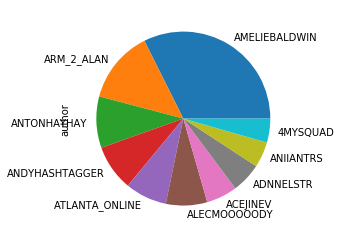

In [16]:
quant_df['author'].value_counts().nlargest(10).plot.pie()

Creating frequency counts from qualitative data creates a new quantitative variable, and has changed the level of analysis. The original data would consist of a huge table with a record for each author in creating the frequency data shown here, the level of analysis is shifted from the individual to the class.

### Exercise 3
* Obtain mean, median, mode, range, standard deviation, and variance of the frequency of account types
* Describe what this means for our data